In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from pathlib import Path
from psutil._common import bytes2human

In [5]:
# !gh run download 15794061896

In [6]:
# !gh run view 15794061896

In [7]:
annotations_log = """
ANNOTATIONS
! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (buildings, monaco, pydriosm): .github#17

X The operation was canceled.
run_benchmarks (buildings, poland, pyrosm): .github#2067

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (buildings, poland, osmnx): .github#17

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (buildings, us_district-of-columbia, pydriosm): .github#17

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (highways, monaco, pydriosm): .github#17

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (buildings, portugal, pydriosm): .github#17

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (highways, us_district-of-columbia, pydriosm): .github#17

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (buildings, greater_london, pydriosm): .github#17

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (buildings, paris, pydriosm): .github#17

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (highways, paris, pydriosm): .github#17

X The operation was canceled.
run_benchmarks (buildings, greater_london, osmnx): .github#17

X The operation was canceled.
run_benchmarks (buildings, portugal, pyrosm): .github#410

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (buildings, poland, pydriosm): .github#17

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (highways, portugal, pydriosm): .github#17

X The operation was canceled.
run_benchmarks (highways, portugal, osmnx): .github#21

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (highways, greater_london, pydriosm): .github#17

X The operation was canceled.
run_benchmarks (highways, portugal, pyrosm): .github#400

X The operation was canceled.
run_benchmarks (highways, poland, pyrosm): .github#2251

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (all_data, us_district-of-columbia, osmnx): .github#17

X The operation was canceled.
run_benchmarks (highways, greater_london, osmnx): .github#17

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (highways, poland, osmnx): .github#17

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (highways, poland, pydriosm): .github#17

X The operation was canceled.
run_benchmarks (all_data, portugal, pyrosm): .github#368

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (all_data, monaco, osmnx): .github#17

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (all_data, paris, osmnx): .github#17

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (all_data, portugal, osmnx): .github#17

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (all_data, greater_london, osmnx): .github#17

X The operation was canceled.
run_benchmarks (all_data, greater_london, pyrosm): .github#93

X The operation was canceled.
run_benchmarks (all_data, poland, pydriosm): .github#2189

! No files were found with the provided path: results/. No artifacts will be uploaded.
run_benchmarks (all_data, poland, osmnx): .github#17

X The operation was canceled.
run_benchmarks (all_data, poland, pyrosm): .github#2005
"""

lines = annotations_log.splitlines()
failed_benchmarks = []
for line_number, line in enumerate(lines):
    if line.startswith("X The operation was canceled."):
        benchmark_info = lines[line_number + 1].split(" (")[1].split("): ")[0]
        failed_benchmarks.append(tuple(benchmark_info.split(", ")))
failed_benchmarks

[('buildings', 'poland', 'pyrosm'),
 ('buildings', 'greater_london', 'osmnx'),
 ('buildings', 'portugal', 'pyrosm'),
 ('highways', 'portugal', 'osmnx'),
 ('highways', 'portugal', 'pyrosm'),
 ('highways', 'poland', 'pyrosm'),
 ('highways', 'greater_london', 'osmnx'),
 ('all_data', 'portugal', 'pyrosm'),
 ('all_data', 'greater_london', 'pyrosm'),
 ('all_data', 'poland', 'pydriosm'),
 ('all_data', 'poland', 'pyrosm')]

In [8]:
results = pd.concat(
    [pd.read_csv(p) for p in Path("artifacts").glob("**/*.csv")]
).sort_values(["benchmark", "region", "function", "idx"])
results["benchmark"] = results["benchmark"].str.replace(" ", "_")
results

benchmark                   region      function  idx  download_size_bytes  \
0   all_data           greater_london  esy_osmshape    1            132112696   
1   all_data           greater_london  esy_osmshape    2            132112696   
2   all_data           greater_london  esy_osmshape    3            132112696   
3   all_data           greater_london  esy_osmshape    4            132112696   
4   all_data           greater_london  esy_osmshape    5            132112696   
..       ...                      ...           ...  ...                  ...   
5   highways  us_district-of-columbia      quackosm    6             19955805   
6   highways  us_district-of-columbia      quackosm    7             19955805   
7   highways  us_district-of-columbia      quackosm    8             19955805   
8   highways  us_district-of-columbia      quackosm    9             19955805   
9   highways  us_district-of-columbia      quackosm   10             19955805   

    elapsed_time   cpu_avg  cpu_max    memory_avg  memory_max  timeout  \
0    1181.325668  0.999552    1.125  5.011445e+08   668725248    False   
1    1174.420321  0.999436    1.131  5.011816e+08   669327360    False   
2    1180.540486  0.999459    1.132  5.013809e+08   669601792    False   
3    1171.640523  0.999406    1.126  5.017907e+08   669507584    False   
4    1169.865810  0.999540    1.296  5.020084e+08   669286400    False   
..           ...       ...      ...           ...         ...      ...   
5      16.176120  0.903071    3.970  3.508415e+08   550617088    False   
6      16.150824  0.900857    4.002  3.435267e+08   518156288    False   
7      16.116307  0.895971    3.979  3.495299e+08   524390400    False   
8      16.198039  0.913979    3.998  3.513274e+08   527007744    False   
9      16.179870  0.891237    3.954  3.537801e+08   520146944    False   

   exception_name exception_message  
0             NaN               NaN  
1             NaN               NaN  
2             NaN               NaN  
3             NaN               NaN  
4             NaN               NaN  
..            ...               ...  
5             NaN               NaN  
6             NaN               NaN  
7             NaN               NaN  
8             NaN               NaN  
9             NaN               NaN  

[779 rows x 13 columns]

In [9]:
results[["benchmark", "region"]].drop_duplicates()

benchmark                   region
0   all_data           greater_london
0   all_data                   monaco
0   all_data                    paris
0   all_data                   poland
0   all_data                 portugal
0   all_data  us_district-of-columbia
0  buildings           greater_london
0  buildings                   monaco
0  buildings                    paris
0  buildings                   poland
0  buildings                 portugal
0  buildings  us_district-of-columbia
0   highways           greater_london
0   highways                   monaco
0   highways                    paris
0   highways                   poland
0   highways                 portugal
0   highways  us_district-of-columbia

In [10]:
results["function"].unique()

array(['esy_osmshape', 'osmium', 'pydriosm', 'quackosm', 'pyrosm',
       'osmnx'], dtype=object)

In [11]:
# https://gist.github.com/thriveth/8560036
palette = {
    "pydriosm": "#377eb8",
    "quackosm": "#ff7f00",
    "pyrosm": "#4daf4a",
    "esy_osmshape": "#f781bf",
    "osmium": "#a65628",
    "osmnx": "#984ea3",
}

palette_lighter = {
    "pydriosm": "#82b2da",
    "quackosm": "#ffb266",
    "pyrosm": "#93d091",
    "esy_osmshape": "#fab3d9",
    "osmium": "#dc956c",
    "osmnx": "#c392cb",
}

functions_proper_names = {
    "pydriosm": "PyDriosm",
    "quackosm": "QuackOSM",
    "pyrosm": "Pyrosm",
    "esy_osmshape": "esy.osm.shape",
    "osmium": "PyOsmium",
    "osmnx": "OSMnx",
}

benchmark_proper_names = {
    "buildings": "Buildings",
    "highways": "Highways",
    "all_data": "All data",
}

region_proper_names = {
    "monaco": "Monaco",
    "paris": "Paris",
    "portugal": "Portugal",
    "greater_london": "Greater London",
    "poland": "Poland",
    "us_district-of-columbia": "US District of Columbia",
}

timeout_per_region = {
    "monaco": "1 minute",
    "us_district-of-columbia": "5 minutes",
    "paris": "10 minutes",
    "greater_london": "20 minutes",
    "portugal": "30 minutes",
    "poland": "60 minutes",
}

functions = sorted(palette.keys())
functions

['esy_osmshape', 'osmium', 'osmnx', 'pydriosm', 'pyrosm', 'quackosm']

In [12]:
sns.set_theme(context="poster", style="whitegrid", palette="colorblind")

Benchmark: all_data, Region: monaco
  Function osmnx not applicable.
Benchmark: all_data, Region: us_district-of-columbia
  Function osmnx not applicable.
Benchmark: all_data, Region: paris
  Function osmnx not applicable.
Benchmark: all_data, Region: greater_london
  Function osmnx not applicable.
  Function pyrosm failed.
Benchmark: all_data, Region: portugal
  Function osmnx not applicable.
  Function pyrosm failed.
Benchmark: all_data, Region: poland
  Function osmnx not applicable.
  Function pydriosm failed.
  Function pyrosm failed.


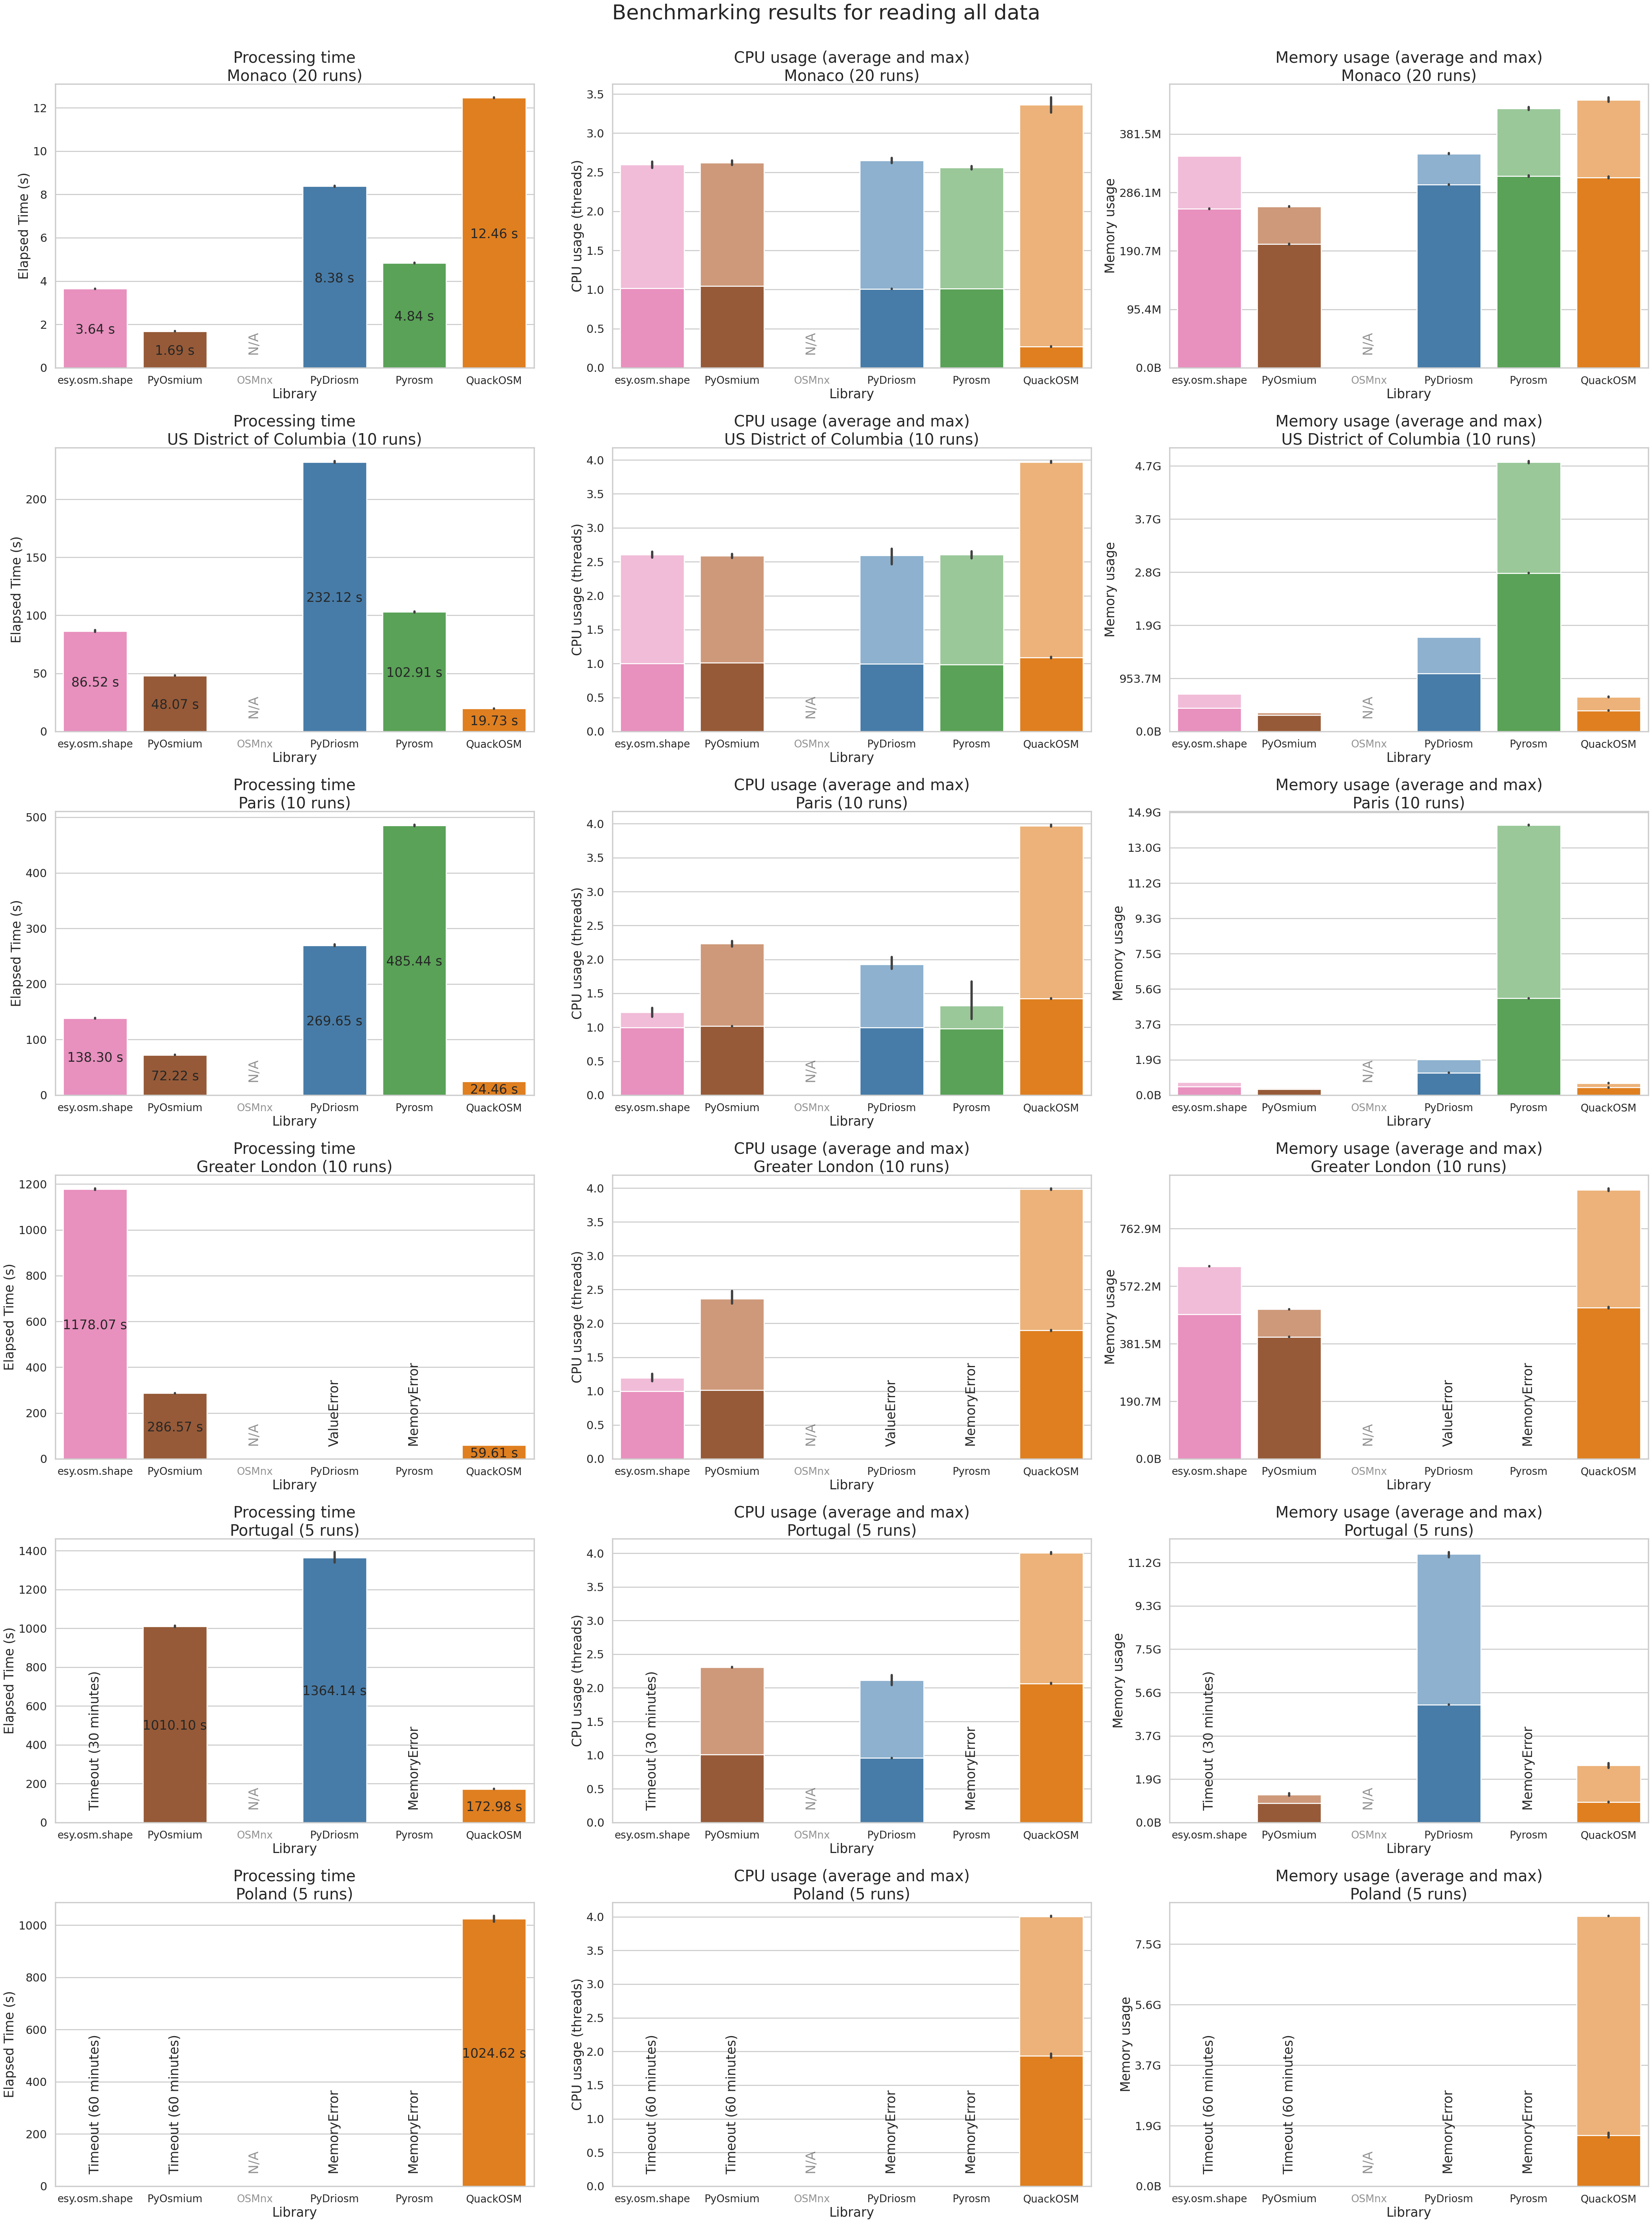

Benchmark: buildings, Region: monaco
  Function pydriosm not applicable.
Benchmark: buildings, Region: us_district-of-columbia
  Function pydriosm not applicable.
Benchmark: buildings, Region: paris
  Function pydriosm not applicable.
Benchmark: buildings, Region: greater_london
  Function osmnx failed.
  Function pydriosm not applicable.
Benchmark: buildings, Region: portugal
  Function pydriosm not applicable.
  Function pyrosm failed.
Benchmark: buildings, Region: poland
  Function osmnx not applicable.
  Function pydriosm not applicable.
  Function pyrosm failed.


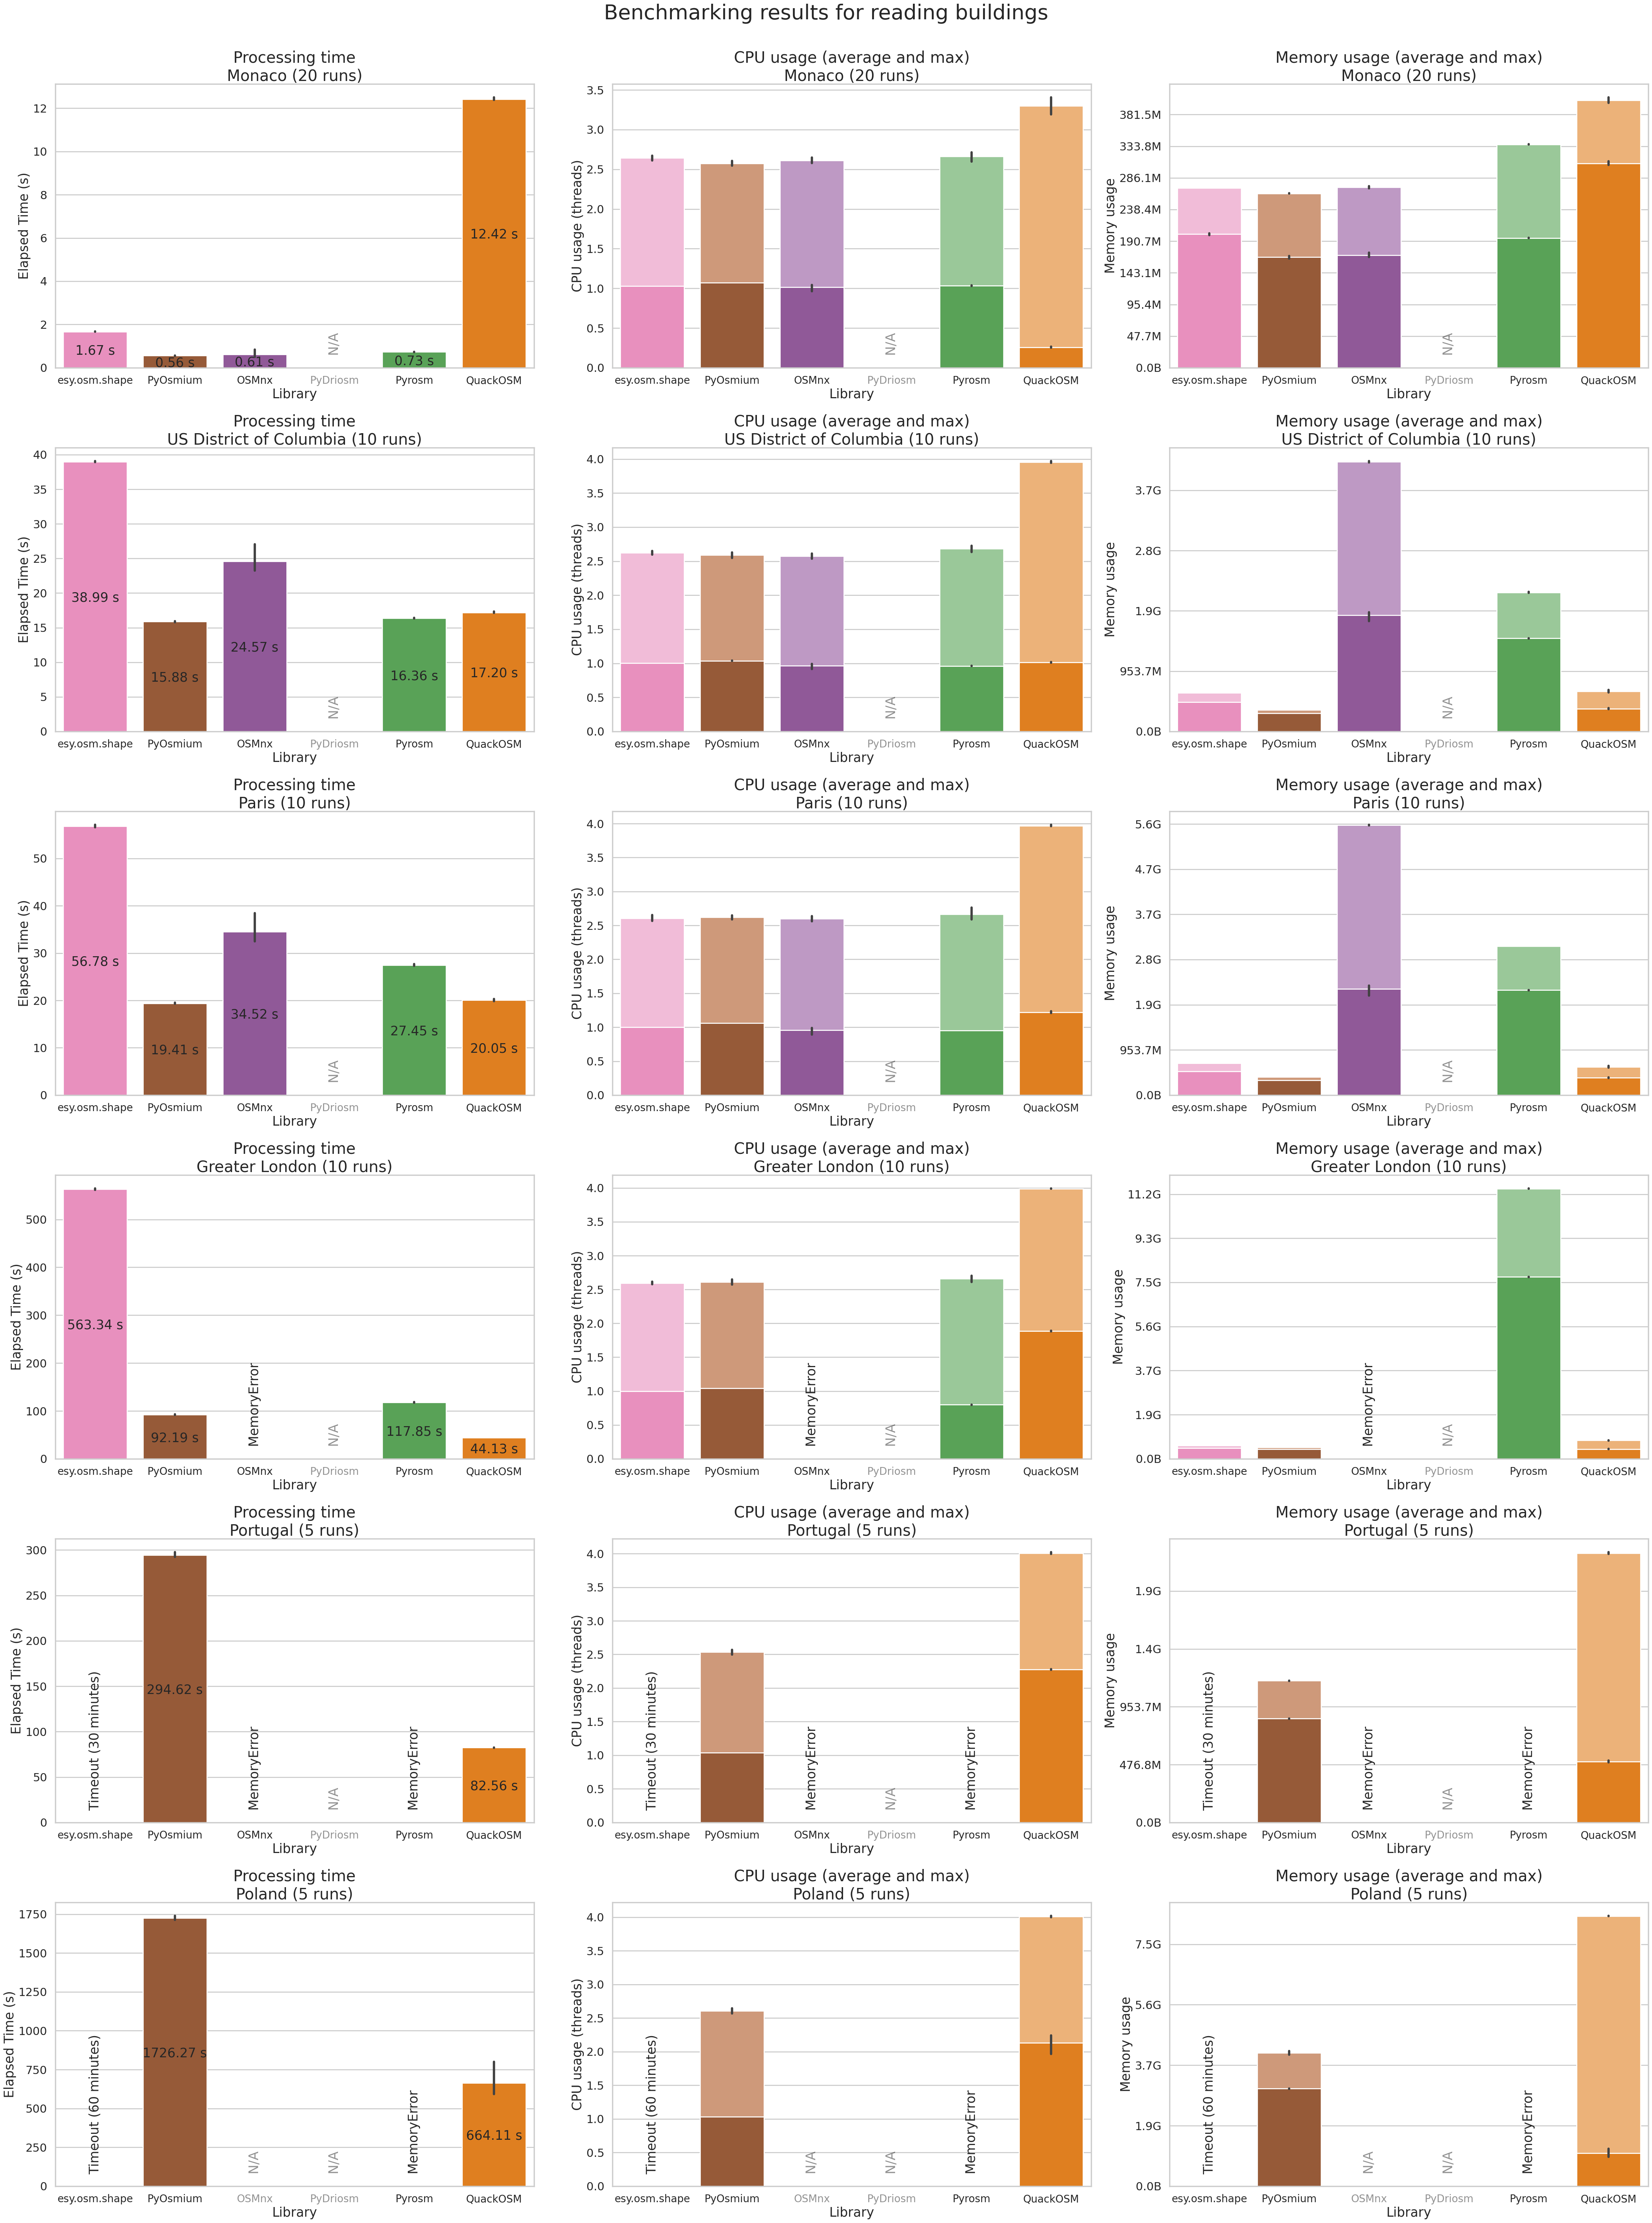

Benchmark: highways, Region: monaco
  Function pydriosm not applicable.
Benchmark: highways, Region: us_district-of-columbia
  Function pydriosm not applicable.
Benchmark: highways, Region: paris
  Function pydriosm not applicable.
Benchmark: highways, Region: greater_london
  Function osmnx failed.
  Function pydriosm not applicable.
Benchmark: highways, Region: portugal
  Function osmnx failed.
  Function pydriosm not applicable.
  Function pyrosm failed.
Benchmark: highways, Region: poland
  Function osmnx not applicable.
  Function pydriosm not applicable.
  Function pyrosm failed.


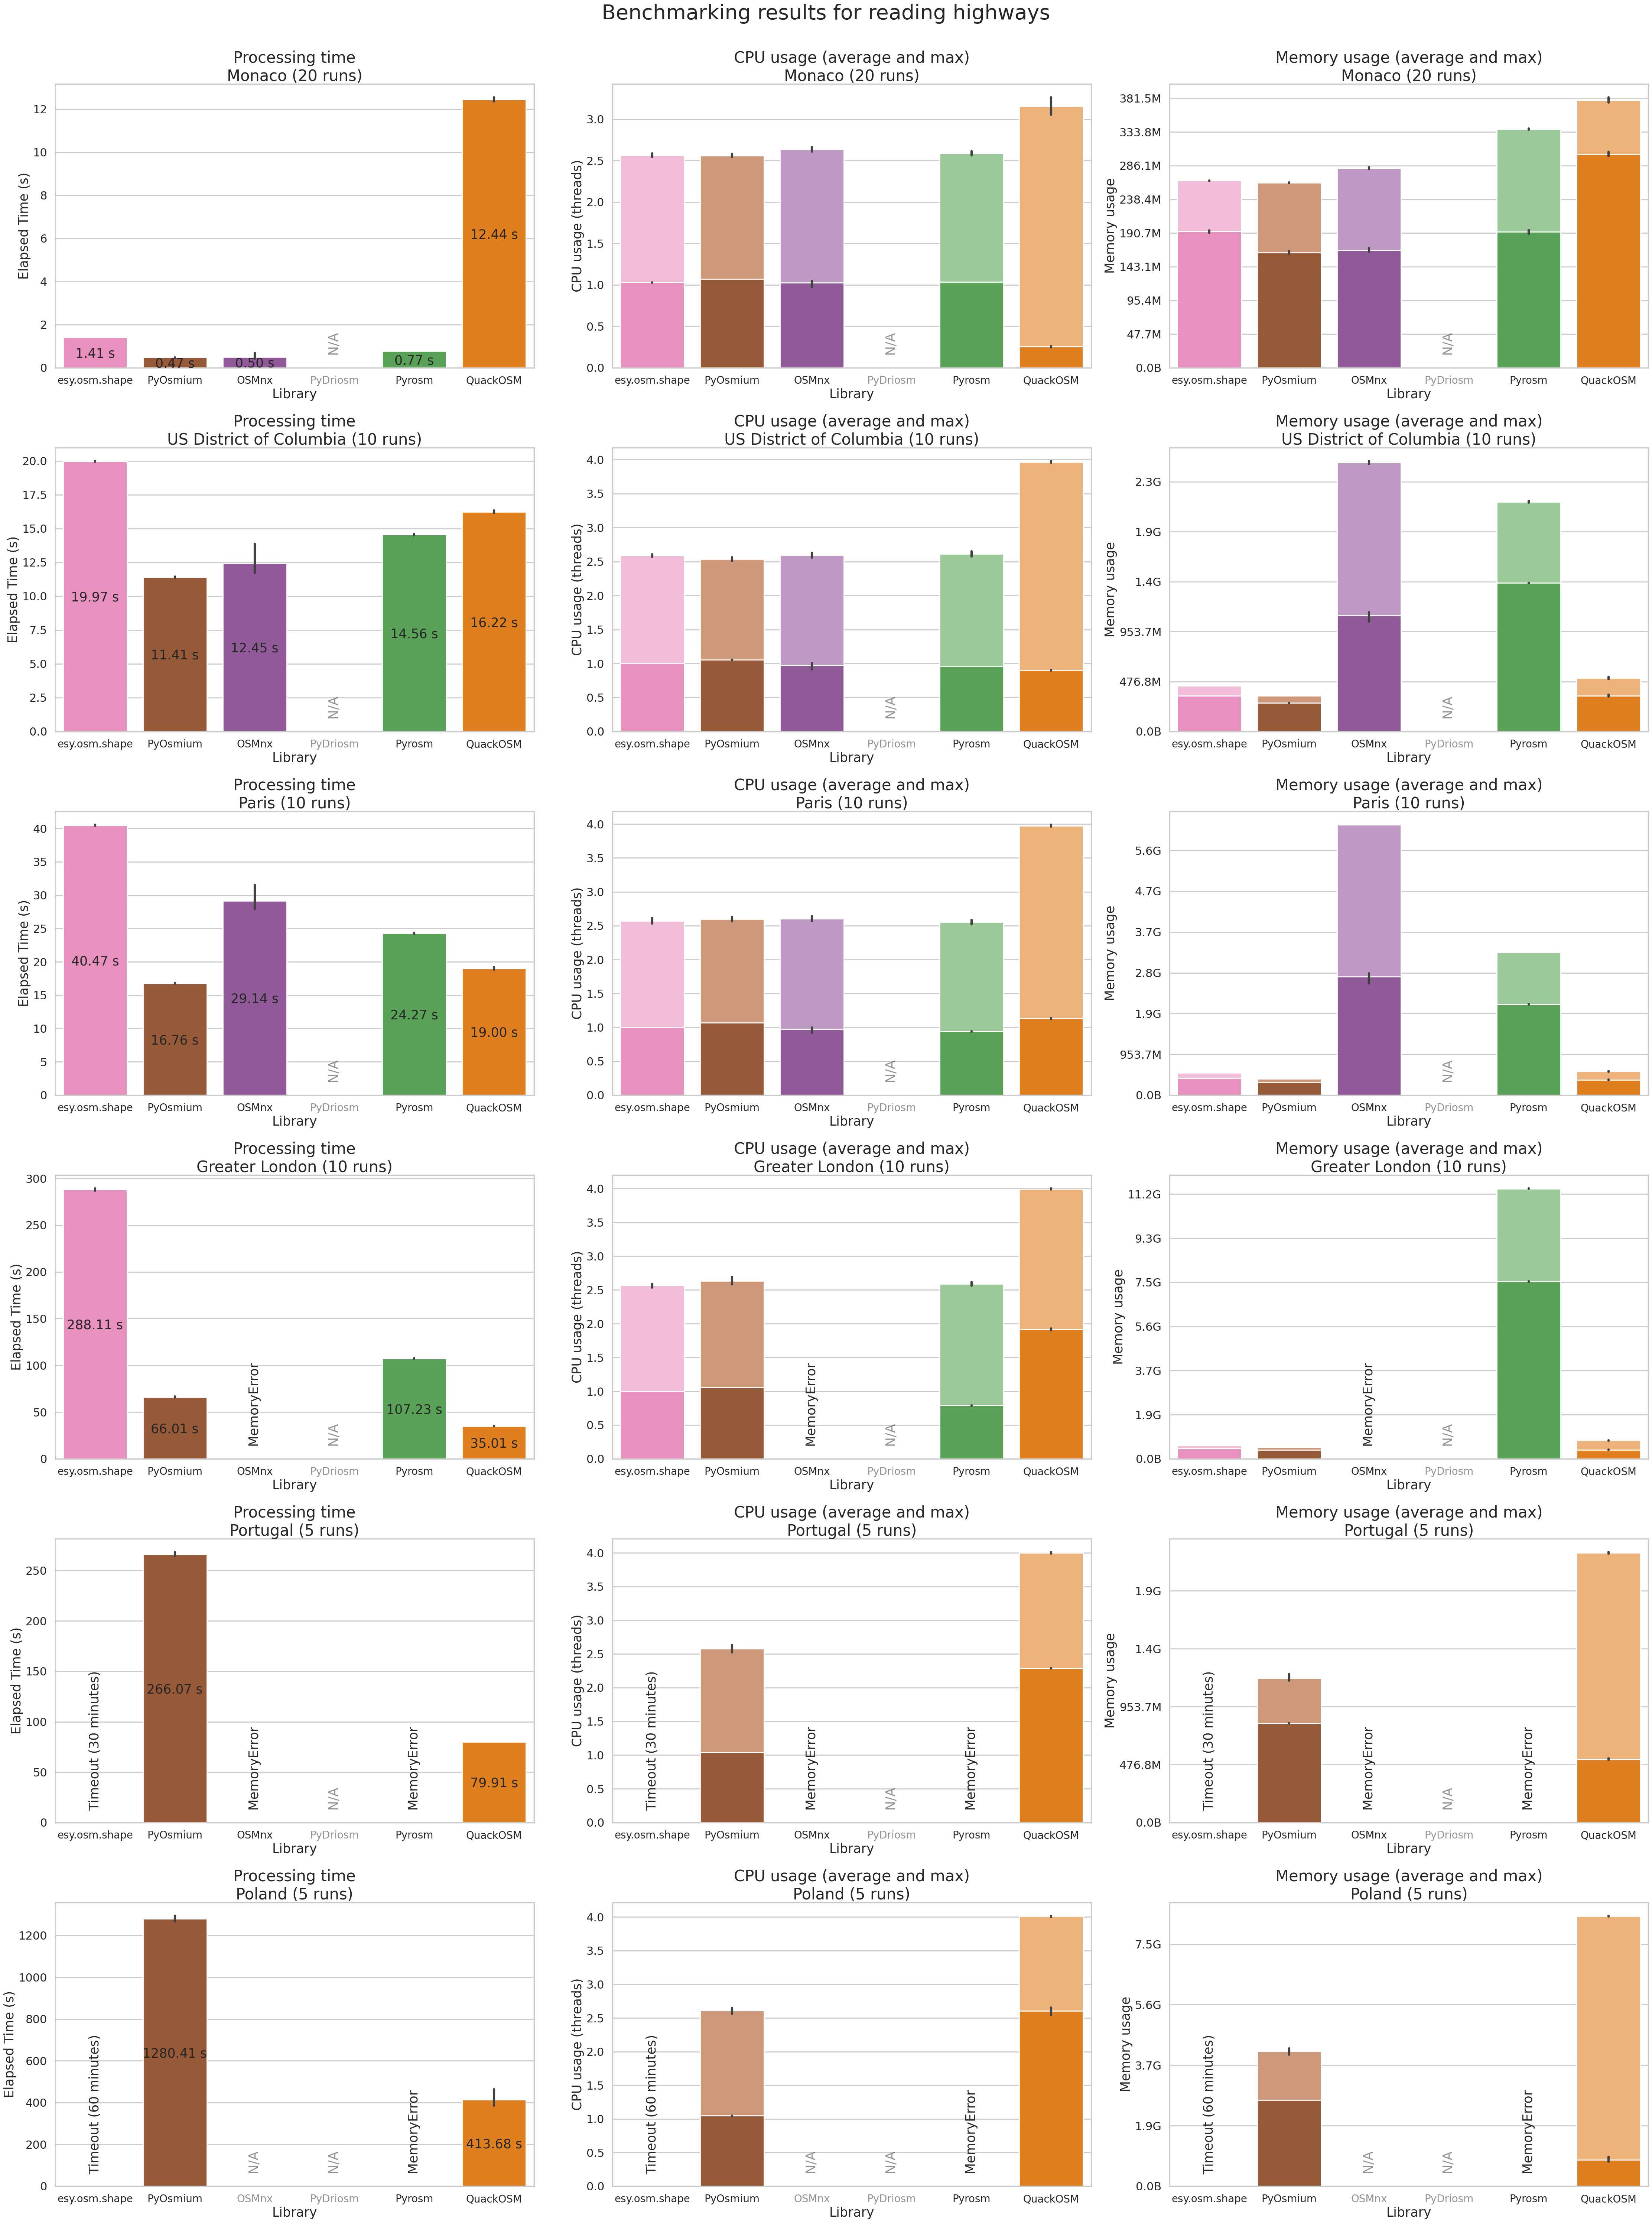

In [75]:
import warnings

def _sizeof_fmt(x, pos):
    if x < 0:
        return ""
    return bytes2human(x)

horizontal = True

for benchmark in results["benchmark"].unique():
    multiplier = 10
    aspect_ratio = 1.5
    rows = len(timeout_per_region)
    cols = 3

    if not horizontal:
        rows, cols = cols, rows

    fig, axes = plt.subplots(
        nrows=rows, ncols=cols, figsize=(aspect_ratio * multiplier * cols, multiplier * rows)
    )

    fig.suptitle(
        f"Benchmarking results for reading {benchmark_proper_names[benchmark].lower()}",
        fontsize=40,
        y=1.0,
    )

    for idx, region in enumerate(timeout_per_region.keys()):
        if horizontal:
            ax1 = axes[idx, 0]
            ax2 = axes[idx, 1]
            ax3 = axes[idx, 2]
        else:
            ax1 = axes[0, idx]
            ax2 = axes[1, idx]
            ax3 = axes[2, idx]

        _subset = (
            results[(results["benchmark"] == benchmark) & (results["region"] == region)]
            .copy()
            .reset_index(drop=True)
        )
        _subset["is_exception"] = ~_subset["exception_name"].isna()
        print(f"Benchmark: {benchmark}, Region: {region}")

        for function in functions:
            if function not in _subset["function"].unique():
                _subset.loc[len(_subset), "function"] = function
                _subset.loc[len(_subset) - 1, "elapsed_time"] = 0
                _subset.loc[len(_subset) - 1, "cpu_avg"] = 0
                _subset.loc[len(_subset) - 1, "cpu_max"] = 0
                _subset.loc[len(_subset) - 1, "memory_avg"] = 0
                _subset.loc[len(_subset) - 1, "memory_max"] = 0
                if (benchmark, region, function) in failed_benchmarks:
                    print(
                        f"  Function {function} failed."
                    )
                    _subset.loc[len(_subset) - 1, "is_exception"] = True
                else:
                    print(
                        f"  Function {function} not applicable."
                    )
                    _subset.loc[len(_subset) - 1, "not_applies"] = True
            elif (
                _subset[_subset["function"] == function]["is_exception"]
                | _subset[_subset["function"] == function]["timeout"]
            ).any():
                _subset.loc[_subset["function"] == function, "elapsed_time"] = 0

        ax1.set_title(
            (
                "Processing time\n"
                f"{region_proper_names[region]}"
                f" ({int(_subset["idx"].max())} runs)"
            ),
            fontsize=30,
        )
        ax2.set_title(
            (
                "CPU usage (average and max)\n"
                f"{region_proper_names[region]}"
                f" ({int(_subset["idx"].max())} runs)"
            ),
            fontsize=30,
        )
        ax3.set_title(
            (
                "Memory usage (average and max)\n"
                f"{region_proper_names[region]}"
                f" ({int(_subset["idx"].max())} runs)"
            ),
            fontsize=30,
        )
        sns.barplot(
            data=_subset,
            x="function",
            y="elapsed_time",
            hue="function",
            order=functions,
            # hue_order=functions,
            ax=ax1,
            palette=palette,
        )
        sns.barplot(
            data=_subset,
            x="function",
            y="cpu_max",
            hue="function",
            order=functions,
            # hue_order=functions,
            ax=ax2,
            palette=palette_lighter,
        )
        sns.barplot(
            data=_subset,
            x="function",
            y="cpu_avg",
            hue="function",
            order=functions,
            # hue_order=functions,
            ax=ax2,
            palette=palette,
        )
        sns.barplot(
            data=_subset,
            x="function",
            y="memory_max",
            hue="function",
            order=functions,
            # hue_order=functions,
            ax=ax3,
            palette=palette_lighter,
        )
        sns.barplot(
            data=_subset,
            x="function",
            y="memory_avg",
            hue="function",
            order=functions,
            # hue_order=functions,
            ax=ax3,
            palette=palette,
        )

        ax1.set_xlabel("Library", fontsize=25)
        ax2.set_xlabel("Library", fontsize=25)
        ax3.set_xlabel("Library", fontsize=25)
        ax1.set_ylabel("Elapsed Time (s)", fontsize=25)
        ax2.set_ylabel("CPU usage (threads)", fontsize=25)
        ax3.set_ylabel("Memory usage", fontsize=25)
        ax3.yaxis.set_major_formatter(tkr.FuncFormatter(_sizeof_fmt))

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            for _ax in (ax1, ax2, ax3):
                _ax.set_xticklabels(
                    [functions_proper_names[f] for f in functions],
                    fontsize=20,
                )

        for function, tick1, tick2, tick3 in zip(
            functions,
            ax1.get_xticklabels(),
            ax2.get_xticklabels(),
            ax3.get_xticklabels(),
        ):
            text = None
            alpha = 1
            if _subset[_subset["function"] == function]["is_exception"].any():
                if _subset[_subset["function"] == function]["exception_name"].any():
                    exception_name = _subset[_subset["function"] == function][
                        "exception_name"
                    ].values[0]
                    text = exception_name
                else:
                    text = "MemoryError"
            elif _subset[_subset["function"] == function]["timeout"].any():
                text = f"Timeout ({timeout_per_region[region]})"
            elif (
                "not_applies" in _subset.columns
                and _subset[_subset["function"] == function]["not_applies"].any()
            ):
                text = "N/A"
                alpha = 0.5

            if text:
                for _ax in (ax1, ax2, ax3):
                    _ax.text(
                        function,
                        0,
                        "   " + text,
                        # fontweight="bold",
                        fontsize=25,
                        rotation=90,
                        horizontalalignment="center",
                        verticalalignment="bottom",
                        alpha=alpha,
                    )
                tick1.set_alpha(alpha)
                tick2.set_alpha(alpha)
                tick3.set_alpha(alpha)
            else:
                avg_time = (
                    _subset[_subset["function"] == function]["elapsed_time"]
                    .mean()
                    .round(2)
                )
                ax1.text(
                    function,
                    avg_time / 2,
                    f"{avg_time:.2f} s",
                    # fontweight="bold",
                    fontsize=25,
                    rotation=0,
                    horizontalalignment="center",
                    verticalalignment="center_baseline",
                )

        # plt.show()
    plt.tight_layout()
    fig.savefig(
        f"benchmarking_{benchmark}.png",
        bbox_inches="tight",
        pad_inches=1,
        # dpi=300,
        dpi=50,
    )
    plt.show()

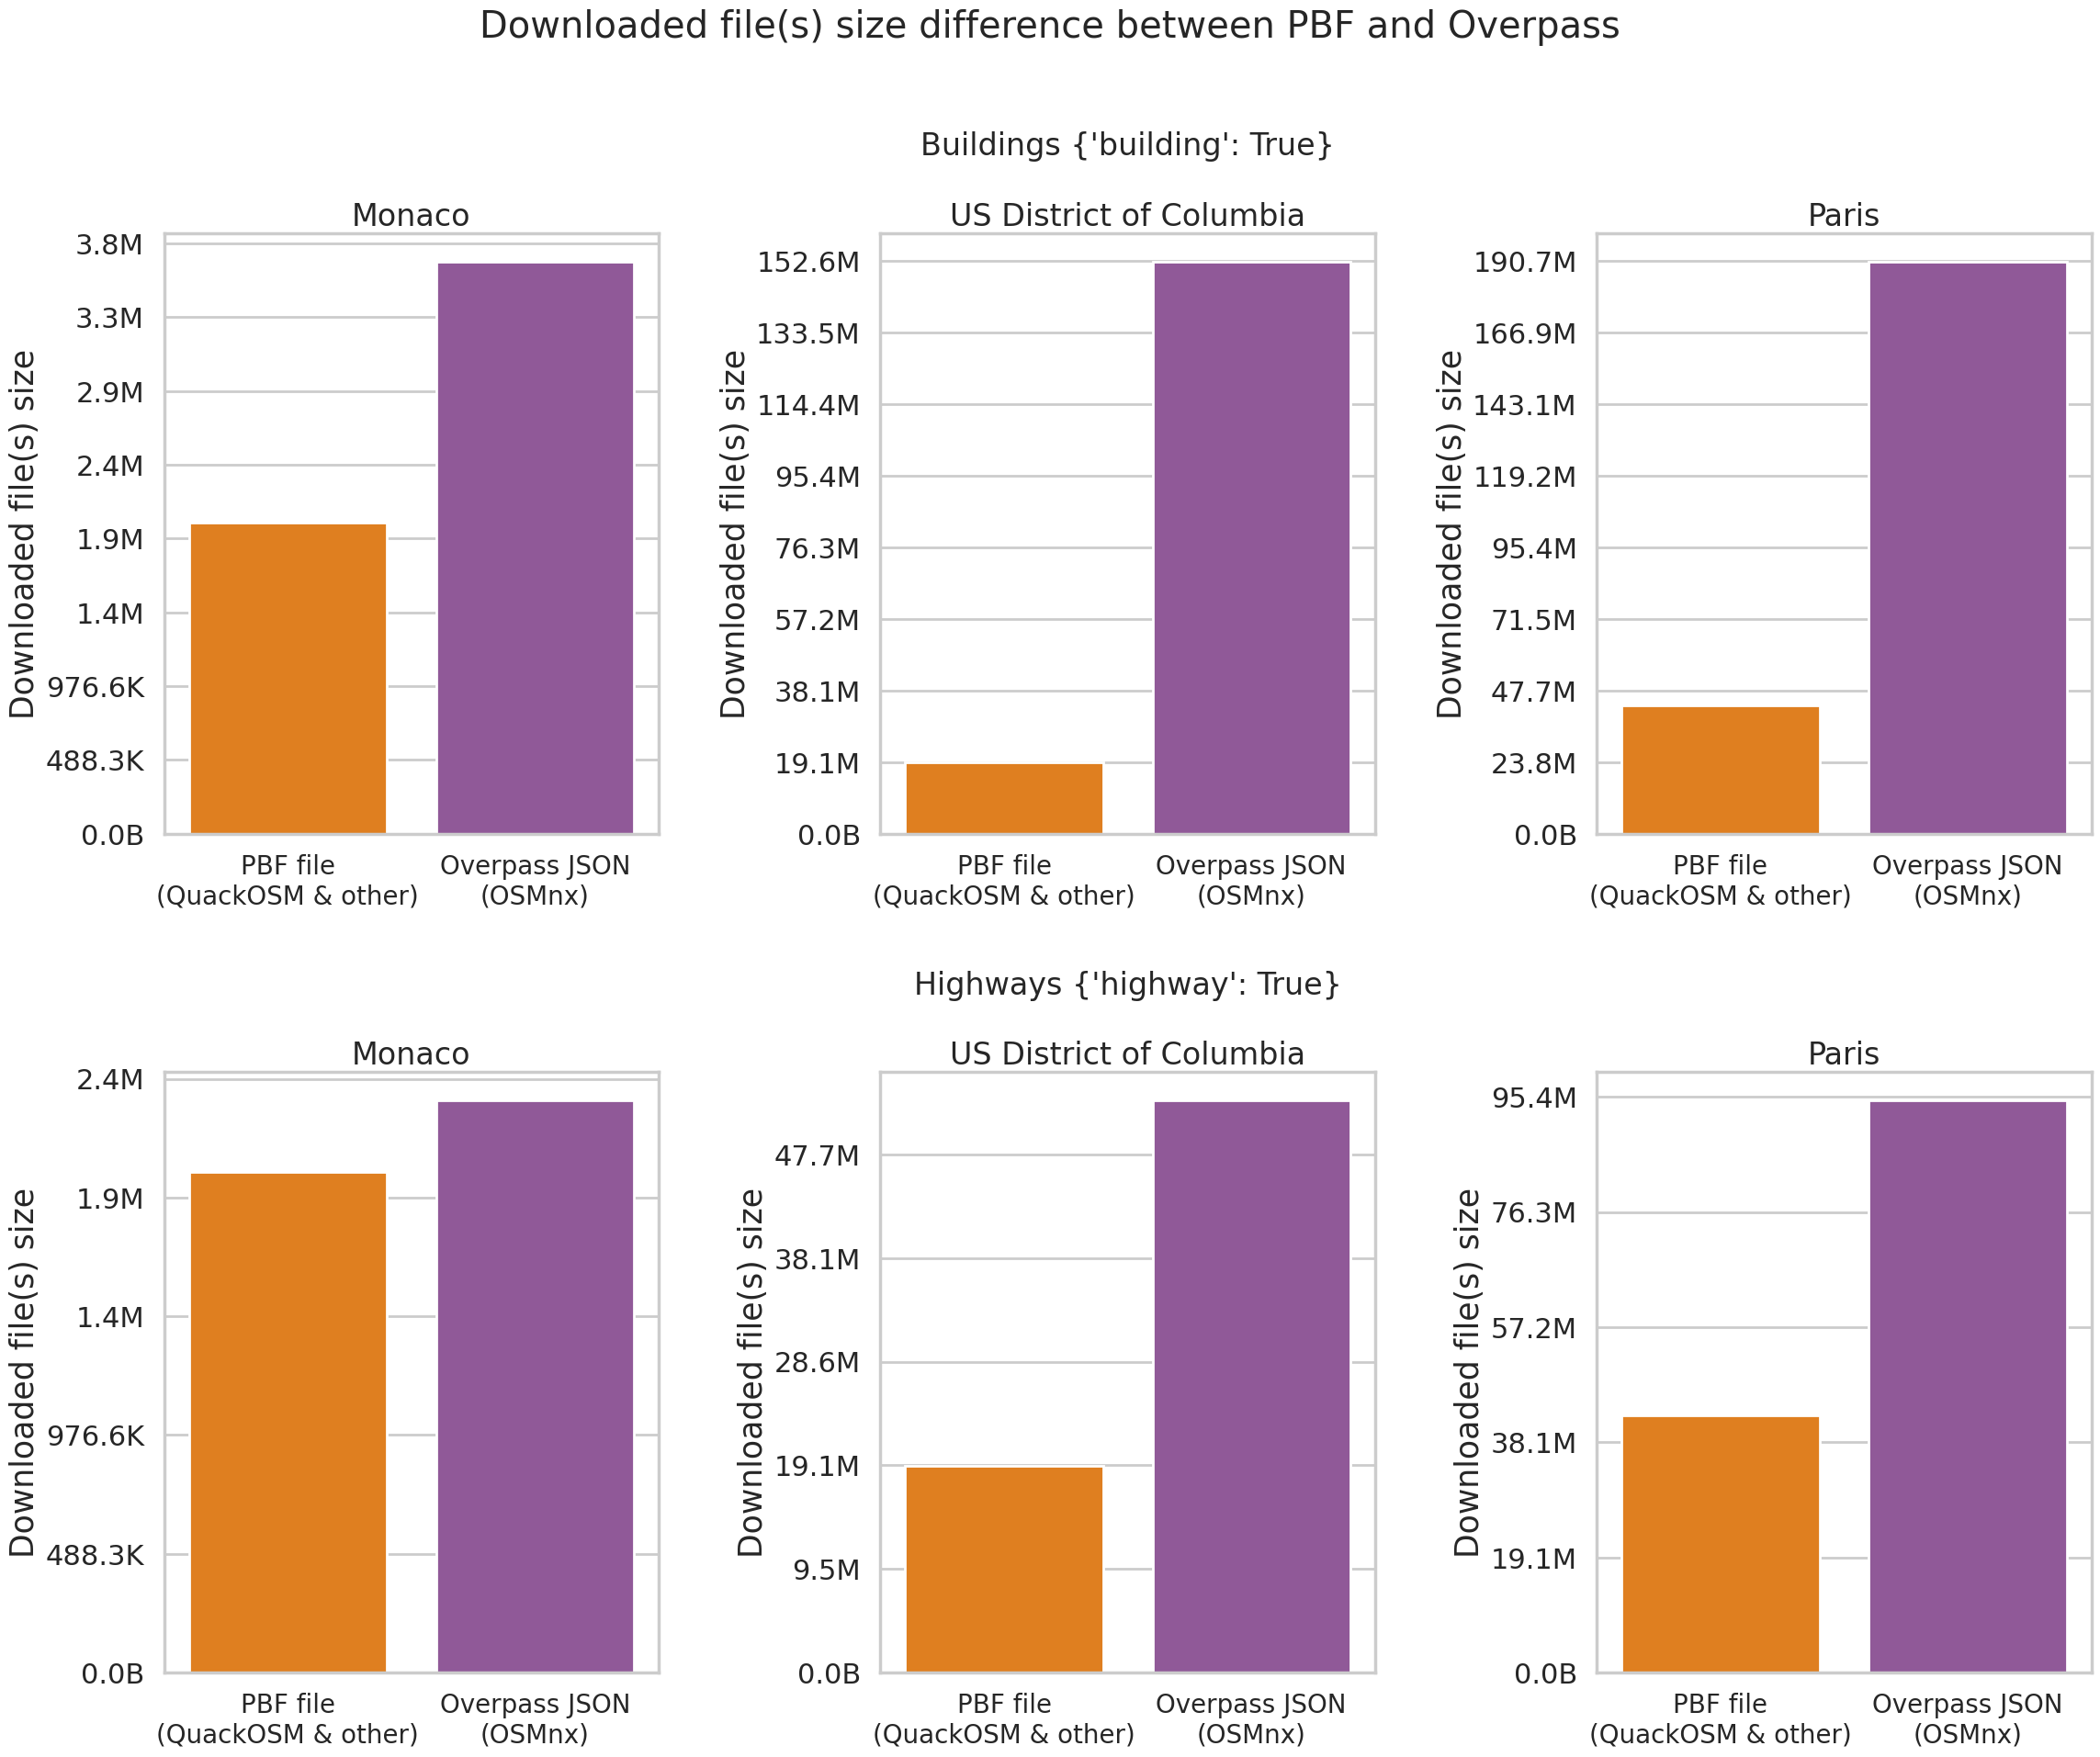

In [85]:
multiplier = 10
aspect_ratio = 0.8
fig, axes = plt.subplots(
    ncols=3, nrows=2, figsize=(aspect_ratio * 3 * multiplier, 2 * multiplier)
)

for b_idx, benchmark in enumerate(("buildings", "highways")):

    fig.suptitle("Downloaded file(s) size difference between PBF and Overpass", y=0.98)
    # suptitle =
    if benchmark == "buildings":
        # fig.suptitle("Buildings {'building': True}", y=0.9)
        suptitle = "Buildings {'building': True}"
    else:
        # fig.suptitle("Highways {'highway': True}", y=0.9)
        suptitle = "Highways {'highway': True}"

    for idx, region in enumerate(("monaco", "us_district-of-columbia", "paris")):
        ax = axes[b_idx, idx]
        if idx == 1:
            ax.set_title(f"{suptitle}\n\n{region_proper_names[region]}")
        else:
            ax.set_title(region_proper_names[region])
        _subset = (
            results[
                (results["benchmark"] == benchmark)
                & (results["region"] == region)
                & (results["function"].isin(["quackosm", "osmnx"]))
            ]
            .copy()
            .reset_index(drop=True)[
                ["benchmark", "region", "function", "download_size_bytes"]
            ]
            .drop_duplicates()
        )

        sns.barplot(
            data=_subset,
            x="function",
            y="download_size_bytes",
            hue="function",
            order=["quackosm", "osmnx"],
            palette=palette,
            ax=ax,
            legend=False,
        )
        ax.set_xlabel(None)
        ax.set_ylabel("Downloaded file(s) size", fontsize=25)
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(_sizeof_fmt))

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            ax.set_xticklabels(
                ["PBF file\n(QuackOSM & other)", "Overpass JSON\n(OSMnx)"],
                fontsize=20,
            )
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(_sizeof_fmt))

plt.tight_layout(pad=2)

fig.savefig(
    "data_download_difference.png",
    bbox_inches="tight",
    pad_inches=1,
    # dpi=300,
    dpi=50,
)

plt.show()

benchmark  region  function  idx  download_size_bytes  elapsed_time  \
128  buildings  monaco  quackosm    9              2106870     12.408499   
129  buildings  monaco  quackosm   10              2106870     12.408662   
130  buildings  monaco  quackosm   11              2106870     12.380868   
131  buildings  monaco  quackosm   12              2106870     12.329464   
132  buildings  monaco  quackosm   13              2106870     12.375121   
..         ...     ...       ...  ...                  ...           ...   
194  buildings  poland    osmium    4           1938807459   1718.871185   
200  buildings  poland  quackosm    5           1938807459    593.661473   
196  buildings  poland  quackosm    1           1938807459    933.443091   
197  buildings  poland  quackosm    2           1938807459    596.263396   
198  buildings  poland  quackosm    3           1938807459    608.502220   

      cpu_avg  cpu_max    memory_avg  memory_max  timeout exception_name  \
128  0.259518    3.602  3.180939e+08   424316928    False            NaN   
129  0.255600    3.606  3.230275e+08   416489472    False            NaN   
130  0.256446    3.057  3.225418e+08   424706048    False            NaN   
131  0.259514    3.643  3.183108e+08   423481344    False            NaN   
132  0.258243    3.559  3.247163e+08   422490112    False            NaN   
..        ...      ...           ...         ...      ...            ...   
194  1.033626    2.612  3.211860e+09  4475265024    False            NaN   
200  2.191793    4.004  9.454117e+08  8919605248    False            NaN   
196  1.805276    4.028  1.373040e+09  8942346240    False            NaN   
197  2.257347    3.996  1.033056e+09  8929333248    False            NaN   
198  2.150565    4.012  9.761743e+08  8930164736    False            NaN   

    exception_message  
128               NaN  
129               NaN  
130               NaN  
131               NaN  
132               NaN  
..                ...  
194               NaN  
200               NaN  
196               NaN  
197               NaN  
198               NaN  

[263 rows x 13 columns]

<Axes: xlabel='region', ylabel='download_size_bytes'>

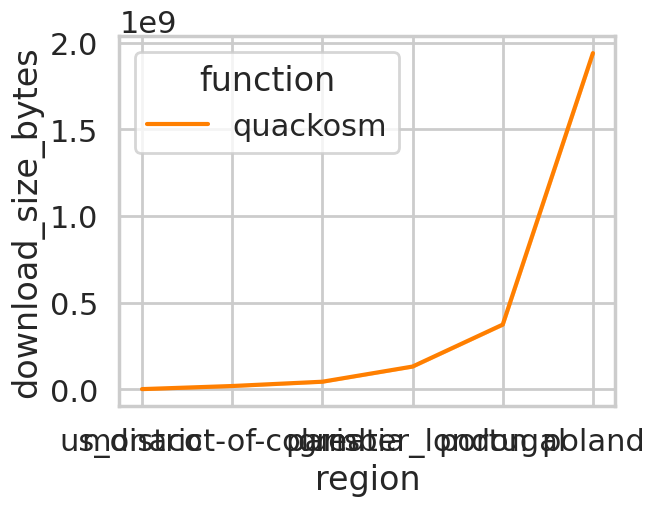

In [95]:
_subset = results[(results["benchmark"] == "buildings") & (results["function"] == "quackosm")].copy().reset_index(drop=True)

sort_order = {k: i for i, k in enumerate(timeout_per_region.keys())}

sns.lineplot(
    data=_subset.sort_values("region", key=lambda x: x.map(sort_order)),
    x="region",
    y="download_size_bytes",
    hue="function",
    # style="function",
    # markers=True,
    dashes=False,
    palette=palette,
    # legend="full",
)